# Trends Dataset Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\arnol\OneDrive\Documents\Trends\clean_trends.csv")

In [3]:
data.head()

,<TREND>,<CHANGE>,<START>,<STOP>,<BEGIN>,<END>
0,SELL,-0.17005,2019.12.31 22:17,2019.12.31 23:25,10291.1,10273.6
1,BUY,0.07203,2019.12.31 23:25,2019.12.31 23:50,10273.6,10281.0
2,SELL,-0.07392,2019.12.31 23:50,2020.01.01 00:43,10281.0,10273.4
3,BUY,0.05548,2020.01.01 00:43,2020.01.01 01:01,10273.4,10279.1
4,SELL,-0.21792,2020.01.01 01:01,2020.01.01 02:16,10279.1,10256.7


In [4]:
data.shape

(38883, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38883 entries, 0 to 38882
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TREND>   38883 non-null  object 
 1   <CHANGE>  38883 non-null  float64
 2   <START>   38883 non-null  object 
 3   <STOP>    38883 non-null  object 
 4   <BEGIN>   38883 non-null  float64
 5   <END>     38883 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.8+ MB


In [6]:
data.describe()

,<CHANGE>,<BEGIN>,<END>
count,38883.000000,38883.000000,38883.000000
mean,-0.000387,9173.650673,9173.605918
std,0.134009,538.226938,538.206367
min,-0.695650,8279.500000,8279.500000
25%,-0.101090,8725.400000,8725.350000
50%,-0.028840,9003.700000,9003.400000
75%,0.099820,9684.500000,9684.450000
max,0.657730,10291.100000,10281.000000


### Checking for Null values

<Axes: >

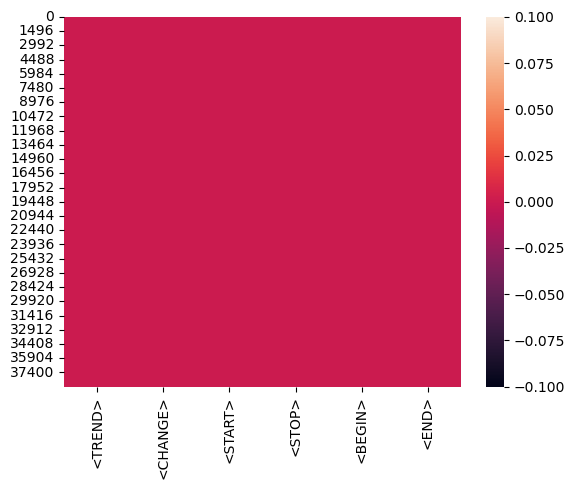

In [7]:
sns.heatmap(data.isnull())

### Checking for Duplicate Values

In [8]:
data.duplicated().any()

False

### Changing the Column Names

In [9]:
data.columns

Index(['<TREND>', '<CHANGE>', '<START>', '<STOP>', '<BEGIN>', '<END>'], dtype='object')

In [10]:
data2 = pd.DataFrame(data)

In [11]:
data2.columns = [col.strip('<>').strip() for col in data2.columns]

In [12]:
data2

,TREND,CHANGE,START,STOP,BEGIN,END
0,SELL,-0.17005,2019.12.31 22:17,2019.12.31 23:25,10291.1,10273.6
1,BUY,0.07203,2019.12.31 23:25,2019.12.31 23:50,10273.6,10281.0
2,SELL,-0.07392,2019.12.31 23:50,2020.01.01 00:43,10281.0,10273.4
3,BUY,0.05548,2020.01.01 00:43,2020.01.01 01:01,10273.4,10279.1
4,SELL,-0.21792,2020.01.01 01:01,2020.01.01 02:16,10279.1,10256.7
...,...,...,...,...,...,...
38878,SELL,-0.13070,2023.11.07 18:41,2023.11.07 20:27,8569.1,8557.9
38879,BUY,0.12269,2023.11.07 20:27,2023.11.07 21:08,8557.9,8568.4
38880,SELL,-0.13772,2023.11.07 21:08,2023.11.07 21:45,8568.4,8556.6
38881,BUY,0.08415,2023.11.07 21:45,2023.11.07 22:03,8556.6,8563.8


### Adding Price Difference Column

In [13]:
data2['difference'] = data2['END'] - data2['BEGIN']

In [14]:
data2

,TREND,CHANGE,START,STOP,BEGIN,END,difference
0,SELL,-0.17005,2019.12.31 22:17,2019.12.31 23:25,10291.1,10273.6,-17.5
1,BUY,0.07203,2019.12.31 23:25,2019.12.31 23:50,10273.6,10281.0,7.4
2,SELL,-0.07392,2019.12.31 23:50,2020.01.01 00:43,10281.0,10273.4,-7.6
3,BUY,0.05548,2020.01.01 00:43,2020.01.01 01:01,10273.4,10279.1,5.7
4,SELL,-0.21792,2020.01.01 01:01,2020.01.01 02:16,10279.1,10256.7,-22.4
...,...,...,...,...,...,...,...
38878,SELL,-0.13070,2023.11.07 18:41,2023.11.07 20:27,8569.1,8557.9,-11.2
38879,BUY,0.12269,2023.11.07 20:27,2023.11.07 21:08,8557.9,8568.4,10.5
38880,SELL,-0.13772,2023.11.07 21:08,2023.11.07 21:45,8568.4,8556.6,-11.8
38881,BUY,0.08415,2023.11.07 21:45,2023.11.07 22:03,8556.6,8563.8,7.2


### Sell vs Buy

In [15]:
data2.columns

Index(['TREND', 'CHANGE', 'START', 'STOP', 'BEGIN', 'END', 'difference'], dtype='object')

In [16]:
trend_counts = data2['TREND'].value_counts()

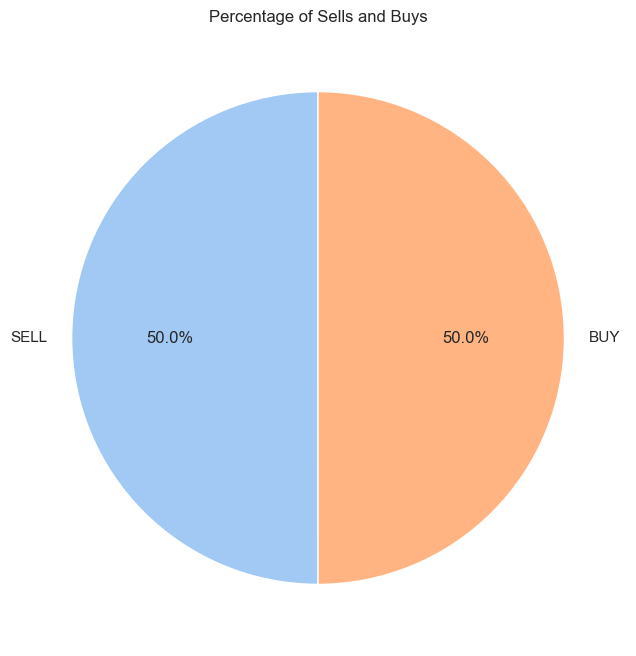

In [17]:
plt.figure(figsize=(8,8))
sns.set(style = "whitegrid")
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%',startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of Sells and Buys')
plt.show()

In [18]:
data2['TREND'].value_counts()

TREND
SELL    19442
BUY     19441
Name: count, dtype: int64

### Splitting the Dates Columns

In [19]:
data2.columns

Index(['TREND', 'CHANGE', 'START', 'STOP', 'BEGIN', 'END', 'difference'], dtype='object')

In [20]:
data2['START'] = pd.to_datetime(data2['START'])

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38883 entries, 0 to 38882
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TREND       38883 non-null  object        
 1   CHANGE      38883 non-null  float64       
 2   START       38883 non-null  datetime64[ns]
 3   STOP        38883 non-null  object        
 4   BEGIN       38883 non-null  float64       
 5   END         38883 non-null  float64       
 6   difference  38883 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.1+ MB


In [22]:
data2['start_month'] = data2['START'].dt.month
data2['start_year'] = data2['START'].dt.year
data2['start_day_of_week'] = data2['START'].dt.dayofweek

In [23]:
data2

,TREND,CHANGE,START,STOP,BEGIN,END,difference,start_month,start_year,start_day_of_week
0,SELL,-0.17005,2019-12-31 22:17:00,2019.12.31 23:25,10291.1,10273.6,-17.5,12,2019,1
1,BUY,0.07203,2019-12-31 23:25:00,2019.12.31 23:50,10273.6,10281.0,7.4,12,2019,1
2,SELL,-0.07392,2019-12-31 23:50:00,2020.01.01 00:43,10281.0,10273.4,-7.6,12,2019,1
3,BUY,0.05548,2020-01-01 00:43:00,2020.01.01 01:01,10273.4,10279.1,5.7,1,2020,2
4,SELL,-0.21792,2020-01-01 01:01:00,2020.01.01 02:16,10279.1,10256.7,-22.4,1,2020,2
...,...,...,...,...,...,...,...,...,...,...
38878,SELL,-0.13070,2023-11-07 18:41:00,2023.11.07 20:27,8569.1,8557.9,-11.2,11,2023,1
38879,BUY,0.12269,2023-11-07 20:27:00,2023.11.07 21:08,8557.9,8568.4,10.5,11,2023,1
38880,SELL,-0.13772,2023-11-07 21:08:00,2023.11.07 21:45,8568.4,8556.6,-11.8,11,2023,1
38881,BUY,0.08415,2023-11-07 21:45:00,2023.11.07 22:03,8556.6,8563.8,7.2,11,2023,1


In [24]:
data2['STOP'] = pd.to_datetime(data2['STOP'])

In [25]:
data2['end_month'] = data2['STOP'].dt.month
data2['end_year'] = data2['STOP'].dt.year
data2['end_day_of_week'] = data2['STOP'].dt.dayofweek

In [26]:
data2.columns

Index(['TREND', 'CHANGE', 'START', 'STOP', 'BEGIN', 'END', 'difference',
       'start_month', 'start_year', 'start_day_of_week', 'end_month',
       'end_year', 'end_day_of_week'],
      dtype='object')

In [27]:
data2.head()

,TREND,CHANGE,START,STOP,BEGIN,END,difference,start_month,start_year,start_day_of_week,end_month,end_year,end_day_of_week
0,SELL,-0.17005,2019-12-31 22:17:00,2019-12-31 23:25:00,10291.1,10273.6,-17.5,12,2019,1,12,2019,1
1,BUY,0.07203,2019-12-31 23:25:00,2019-12-31 23:50:00,10273.6,10281.0,7.4,12,2019,1,12,2019,1
2,SELL,-0.07392,2019-12-31 23:50:00,2020-01-01 00:43:00,10281.0,10273.4,-7.6,12,2019,1,1,2020,2
3,BUY,0.05548,2020-01-01 00:43:00,2020-01-01 01:01:00,10273.4,10279.1,5.7,1,2020,2,1,2020,2
4,SELL,-0.21792,2020-01-01 01:01:00,2020-01-01 02:16:00,10279.1,10256.7,-22.4,1,2020,2,1,2020,2


In [31]:
data2.head()

,TREND,CHANGE,START,STOP,BEGIN,END,difference,start_month,start_year,start_day_of_week,end_month,end_year,end_day_of_week
0,SELL,-0.17005,2019-12-31 22:17:00,2019-12-31 23:25:00,10291.1,10273.6,-17.5,12,2019,1,12,2019,1
1,BUY,0.07203,2019-12-31 23:25:00,2019-12-31 23:50:00,10273.6,10281.0,7.4,12,2019,1,12,2019,1
2,SELL,-0.07392,2019-12-31 23:50:00,2020-01-01 00:43:00,10281.0,10273.4,-7.6,12,2019,1,1,2020,2
3,BUY,0.05548,2020-01-01 00:43:00,2020-01-01 01:01:00,10273.4,10279.1,5.7,1,2020,2,1,2020,2
4,SELL,-0.21792,2020-01-01 01:01:00,2020-01-01 02:16:00,10279.1,10256.7,-22.4,1,2020,2,1,2020,2


### Adjusting to get the names of the days of the week

In [33]:
data2['start_day_name'] = data2['START'].dt.day_name()

In [35]:
data2['stop_day_name'] = data2['STOP'].dt.day_name()

In [37]:
data2.head(3)

,TREND,CHANGE,START,STOP,BEGIN,END,difference,start_month,start_year,start_day_of_week,end_month,end_year,end_day_of_week,start_day_name,stop_day_name
0,SELL,-0.17005,2019-12-31 22:17:00,2019-12-31 23:25:00,10291.1,10273.6,-17.5,12,2019,1,12,2019,1,Tuesday,Tuesday
1,BUY,0.07203,2019-12-31 23:25:00,2019-12-31 23:50:00,10273.6,10281.0,7.4,12,2019,1,12,2019,1,Tuesday,Tuesday
2,SELL,-0.07392,2019-12-31 23:50:00,2020-01-01 00:43:00,10281.0,10273.4,-7.6,12,2019,1,1,2020,2,Tuesday,Wednesday


In [38]:
data2.columns

Index(['TREND', 'CHANGE', 'START', 'STOP', 'BEGIN', 'END', 'difference',
       'start_month', 'start_year', 'start_day_of_week', 'end_month',
       'end_year', 'end_day_of_week', 'start_day_name', 'stop_day_name'],
      dtype='object')

## Volatility Checks

In [39]:
data2.columns

Index(['TREND', 'CHANGE', 'START', 'STOP', 'BEGIN', 'END', 'difference',
       'start_month', 'start_year', 'start_day_of_week', 'end_month',
       'end_year', 'end_day_of_week', 'start_day_name', 'stop_day_name'],
      dtype='object')

In [42]:
data2['start_year'].value_counts()

start_year
2022    10145
2020    10064
2021    10038
2023     8633
2019        3
Name: count, dtype: int64

In [ ]:
data2.groupby('start_year')

In [46]:
grouped_data = data2.groupby(['start_year', 'TREND'])['CHANGE'].sum().reset_index()

In [47]:
grouped_data

,start_year,TREND,CHANGE
0,2019,BUY,0.07203
1,2019,SELL,-0.24397
2,2020,BUY,549.32181
3,2020,SELL,-553.68158
4,2021,BUY,578.24415
5,2021,SELL,-586.55694
6,2022,BUY,625.47628
7,2022,SELL,-625.06005
8,2023,BUY,534.85094
9,2023,SELL,-537.45556


### Number of Sells vs Buys per Year

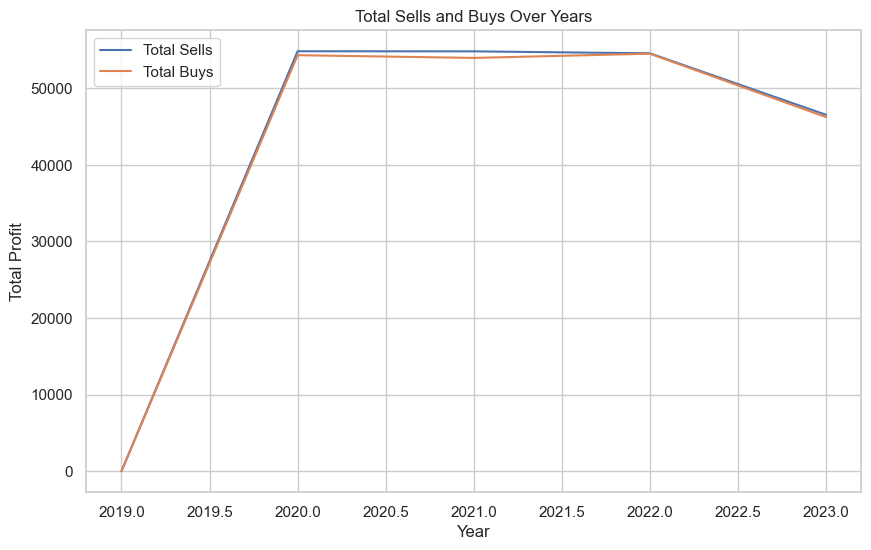

In [56]:
#data2['profit'] = data2['END'] - data2['BEGIN']


#data2['start_year'] = data2['START'].dt.year


grouped_data = data2.groupby(['start_year', 'TREND'])['profit'].sum().reset_index()

# Take absolute values for sells
grouped_data.loc[grouped_data['TREND'] == 'SELL', 'profit'] = grouped_data['profit'].abs()


pivot_data = grouped_data.pivot(index='start_year', columns='TREND', values='profit').reset_index()


pivot_data = pivot_data.fillna(0)


pivot_data['Total_Sells'] = pivot_data['SELL']
pivot_data['Total_Buys'] = pivot_data['BUY']


plt.figure(figsize=(10, 6))
sns.lineplot(x='start_year', y='Total_Sells', data=pivot_data, label='Total Sells')
sns.lineplot(x='start_year', y='Total_Buys', data=pivot_data, label='Total Buys')


plt.title('Total Sells and Buys Over Years')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend()

# Show the plot
plt.show()

### Level of Activity Weekly.

In [57]:
data2.columns

Index(['TREND', 'CHANGE', 'START', 'STOP', 'BEGIN', 'END', 'difference',
       'start_month', 'start_year', 'start_day_of_week', 'end_month',
       'end_year', 'end_day_of_week', 'start_day_name', 'stop_day_name',
       'profit'],
      dtype='object')

In [68]:
data2.groupby('stop_day_name')['TREND'].value_counts()

stop_day_name  TREND
Friday         BUY      2797
               SELL     2789
Monday         SELL     2832
               BUY      2819
Saturday       SELL     2769
               BUY      2758
Sunday         BUY      2767
               SELL     2752
Thursday       SELL     2780
               BUY      2770
Tuesday        BUY      2748
               SELL     2742
Wednesday      BUY      2782
               SELL     2778
Name: count, dtype: int64

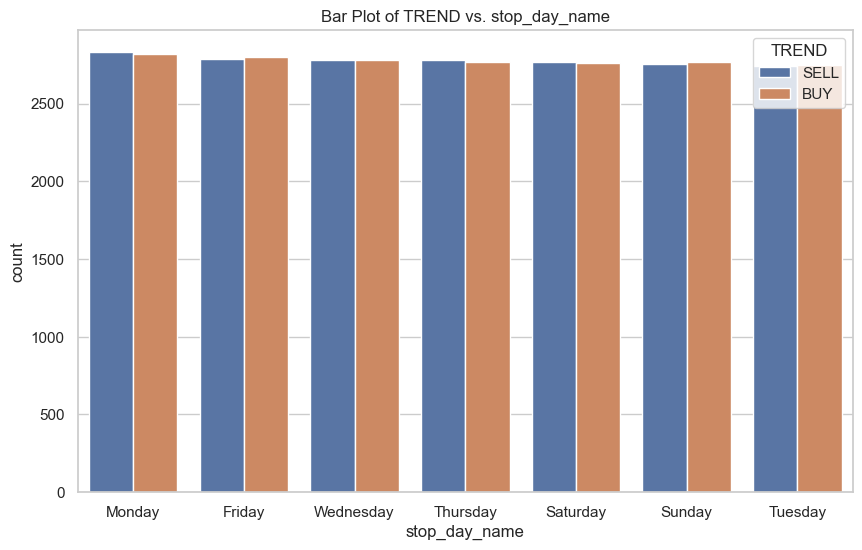

In [74]:
newdata = data2.groupby(['stop_day_name', 'TREND']).size().reset_index(name='count')


newdata = newdata.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="stop_day_name", y="count", hue="TREND", data=newdata, order=newdata['stop_day_name'].unique())


plt.title('Bar Plot of TREND vs. stop_day_name')
plt.show()

In [75]:
data2.head()

,TREND,CHANGE,START,STOP,BEGIN,END,difference,start_month,start_year,start_day_of_week,end_month,end_year,end_day_of_week,start_day_name,stop_day_name,profit
0,SELL,-0.17005,2019-12-31 22:17:00,2019-12-31 23:25:00,10291.1,10273.6,-17.5,12,2019,1,12,2019,1,Tuesday,Tuesday,-17.5
1,BUY,0.07203,2019-12-31 23:25:00,2019-12-31 23:50:00,10273.6,10281.0,7.4,12,2019,1,12,2019,1,Tuesday,Tuesday,7.4
2,SELL,-0.07392,2019-12-31 23:50:00,2020-01-01 00:43:00,10281.0,10273.4,-7.6,12,2019,1,1,2020,2,Tuesday,Wednesday,-7.6
3,BUY,0.05548,2020-01-01 00:43:00,2020-01-01 01:01:00,10273.4,10279.1,5.7,1,2020,2,1,2020,2,Wednesday,Wednesday,5.7
4,SELL,-0.21792,2020-01-01 01:01:00,2020-01-01 02:16:00,10279.1,10256.7,-22.4,1,2020,2,1,2020,2,Wednesday,Wednesday,-22.4


### Extracting the hour and minute of activities.

In [76]:
data2['start_minutes'] = data2['START'].dt.minute
data2['start_hour'] = data2['START'].dt.hour

data2['stop_minutes'] = data2['STOP'].dt.minute
data2['stop_hour'] = data2['STOP'].dt.hour

In [77]:
data2.head()

,TREND,CHANGE,START,STOP,BEGIN,END,difference,start_month,start_year,start_day_of_week,end_month,end_year,end_day_of_week,start_day_name,stop_day_name,profit,start_minutes,start_hour,stop_minutes,stop_hour
0,SELL,-0.17005,2019-12-31 22:17:00,2019-12-31 23:25:00,10291.1,10273.6,-17.5,12,2019,1,12,2019,1,Tuesday,Tuesday,-17.5,17,22,25,23
1,BUY,0.07203,2019-12-31 23:25:00,2019-12-31 23:50:00,10273.6,10281.0,7.4,12,2019,1,12,2019,1,Tuesday,Tuesday,7.4,25,23,50,23
2,SELL,-0.07392,2019-12-31 23:50:00,2020-01-01 00:43:00,10281.0,10273.4,-7.6,12,2019,1,1,2020,2,Tuesday,Wednesday,-7.6,50,23,43,0
3,BUY,0.05548,2020-01-01 00:43:00,2020-01-01 01:01:00,10273.4,10279.1,5.7,1,2020,2,1,2020,2,Wednesday,Wednesday,5.7,43,0,1,1
4,SELL,-0.21792,2020-01-01 01:01:00,2020-01-01 02:16:00,10279.1,10256.7,-22.4,1,2020,2,1,2020,2,Wednesday,Wednesday,-22.4,1,1,16,2


### Activity for different hours of the day.

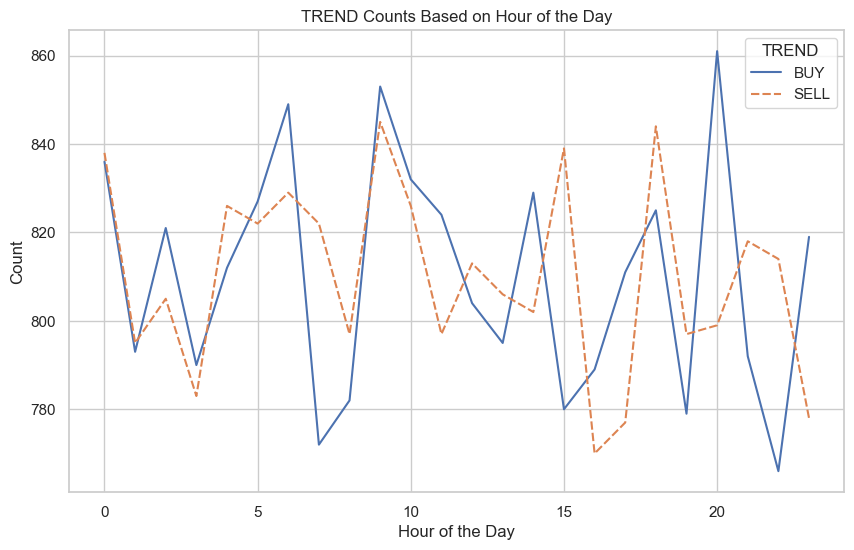

In [78]:
hourly_counts = data2.groupby(['start_hour', 'TREND']).size().reset_index(name='count')

# Pivot the table to have 'TREND' values as columns
hourly_counts_pivot = hourly_counts.pivot(index='start_hour', columns='TREND', values='count').fillna(0)

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts_pivot)
plt.title('TREND Counts Based on Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='TREND')
plt.show()

In [79]:
data2.to_csv(r'C:\Users\arnol\OneDrive\Documents\Trends\trends_cleaned.csv')